In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import scipy.stats as ss
from scipy.signal import find_peaks
import pyabf
from statsmodels.formula.api import ols
import statsmodels.api as sm


import os,sys

sys.path.append('../src') 
#import wholeCell as wc

In [2]:
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 6
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.25
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.major.pad'] = 2

plt.rcParams['ytick.major.width'] = 0.25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.major.pad'] = 2
plt.rcParams['ytick.major.pad'] = 2

plt.rcParams['axes.labelpad'] = 2

## CIN EPSCs

In [3]:
ints = pd.read_excel('../data/Fig3/cinsAuto.xlsx')

In [4]:
ints['date'] = ints['file'].str.slice(1,7)

### V1

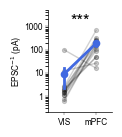

In [5]:
fig, ax = plt.subplots(figsize = (1.2,1.35))
sns.pointplot(data = ints[(ints['genotype'] == 'CHAT')&(ints['sensArea'] == 'V1')], x = 'stimType', y = 'absEPSC', hue = 'file', order = ['590', '405'], palette = 'dark:k', legend = False, linewidth = 1, markersize = 3)
plt.setp(ax.collections, alpha=.2) #for the markers
plt.setp(ax.lines, alpha=.2) 
sns.pointplot(data = ints[(ints['genotype'] == 'CHAT')&(ints['sensArea'] == 'V1')], x = 'stimType', y = 'absEPSC', color = 'RoyalBlue', order = ['590', '405'], errorbar = ('se'), linewidth = 2, markersize = 4)

ax.set_yscale('log')
ax.set_ylim(0.2,5000)

ax.set_ylabel('EPSC$^{-1}$ (pA)', fontsize = 6, labelpad = 0)
ax.set_xticks([0,1])
ax.set_xticklabels(['VIS', 'mPFC'], fontsize = 6)

ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels([1, 10, 100, 1000], fontsize = 6)

ax.text(0.2, 1000, '***', fontsize = 12)

ax.set_xlabel(None)

sns.despine()

plt.tight_layout()
plt.savefig('../figOutputs/Fig3_CINs_V1.pdf', dpi = 300, transparent = True, bbox_inches = 'tight')


In [6]:
ss.mannwhitneyu(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)]['absEPSC'], ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 590)]['absEPSC'])

MannwhitneyuResult(statistic=191.0, pvalue=2.1361748059114528e-05)

In [7]:
print(len(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)]['date'].unique()))
print(len(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)]))
print(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)]['absEPSC'].sem())
print('')
print(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 590)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 590)]['absEPSC'].sem())

5
14
184.03443545954568
45.61028503366057

9.107141630990165
6.754372274017937


### S1

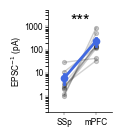

In [8]:
fig, ax = plt.subplots(figsize = (1.2,1.35))
sns.pointplot(data = ints[(ints['genotype'] == 'CHAT')&(ints['sensArea'] == 'S1')], x = 'stimType', y = 'absEPSC', hue = 'file', order = ['590', '405'],palette = 'dark:k', legend = False, linewidth = 1, markersize = 3)
plt.setp(ax.collections, alpha=.2) #for the markers
plt.setp(ax.lines, alpha=.2) 
sns.pointplot(data = ints[(ints['genotype'] == 'CHAT')&(ints['sensArea'] == 'S1')], x = 'stimType', y = 'absEPSC', order = ['590', '405'], color = 'RoyalBlue', errorbar = ('se'), linewidth = 2, markersize = 4)

ax.set_yscale('log')
ax.set_ylim(0.2,5000)

ax.set_ylabel('EPSC$^{-1}$ (pA)', fontsize = 6, labelpad = 0)
ax.set_xticks([0,1])
ax.set_xticklabels(['SSp', 'mPFC'], fontsize = 6)

ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels([1, 10, 100, 1000], fontsize = 6)
ax.set_xlabel(None)

ax.text(0.2, 1000, '***', fontsize = 12)

sns.despine()

plt.tight_layout()
plt.savefig('../figOutputs/Fig3_CINs_S1.pdf', dpi = 300, transparent = True, bbox_inches = 'tight')


In [9]:
ss.mannwhitneyu(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)]['absEPSC'], ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 590)]['absEPSC'])

MannwhitneyuResult(statistic=81.0, pvalue=0.00041229480206169127)

In [10]:
print(len(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)]['date'].unique()))
print(len(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)]))
print(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)]['absEPSC'].sem())
print('')
print(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 590)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 590)]['absEPSC'].sem())

2
9
233.3499323527018
90.51082290674738

6.181720574696858
2.9750626713850097


### A1

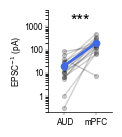

In [11]:
fig, ax = plt.subplots(figsize = (1.2,1.35))
sns.pointplot(data = ints[(ints['genotype'] == 'CHAT')&(ints['sensArea'] == 'A1')], x = 'stimType', y = 'absEPSC', hue = 'file', order = ['590', '405'], palette = 'dark:k', legend = False, linewidth = 1, markersize = 3)
plt.setp(ax.collections, alpha=.2) #for the markers
plt.setp(ax.lines, alpha=.2) 
sns.pointplot(data = ints[(ints['genotype'] == 'CHAT')&(ints['sensArea'] == 'A1')], x = 'stimType', y = 'absEPSC', order = ['590', '405'], color = 'RoyalBlue', errorbar = ('se'), linewidth = 2, markersize = 4)

ax.set_yscale('log')
ax.set_ylim(0.2,5000)

ax.set_ylabel('EPSC$^{-1}$ (pA)', fontsize = 6, labelpad = 0)
ax.set_xticks([0,1])
ax.set_xticklabels(['AUD', 'mPFC'], fontsize = 6)

ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels([1, 10, 100, 1000], fontsize = 6)
ax.set_xlabel(None)

ax.text(0.2, 1000, '***', fontsize = 12)

sns.despine()

plt.tight_layout()
plt.savefig('../figOutputs/Fig3_CINs_A1.pdf', dpi = 300, transparent = True, bbox_inches = 'tight')


In [12]:
ss.mannwhitneyu(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)]['absEPSC'], ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 590)]['absEPSC'])

MannwhitneyuResult(statistic=276.0, pvalue=6.397968641966111e-06)

In [13]:
print(len(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)]['date'].unique()))
print(len(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)]))
print(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)]['absEPSC'].sem())
print('')
print(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 590)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 590)]['absEPSC'].sem())

3
17
190.02069128260894
29.770293678385535

20.13337950145497
5.368599393899614


## MSN EPSCs

In [14]:
ints = pd.read_excel('../data/Fig3/msnsAuto.xlsx')
ints['date'] = ints['file'].str.slice(1,7)

### V1

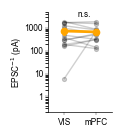

In [15]:
fig, ax = plt.subplots(figsize = (1.2,1.35))
sns.pointplot(data = ints[(ints['cellType'] == 'MSN')&(ints['sensArea'] == 'V1')], x = 'stimType', y = 'absEPSC', order = ['590', '405'], hue = 'file', palette = 'dark:k', legend = False, linewidth = 1, markersize = 3)
plt.setp(ax.collections, alpha=.2) #for the markers
plt.setp(ax.lines, alpha=.2) 
sns.pointplot(data = ints[(ints['cellType'] == 'MSN')&(ints['sensArea'] == 'V1')], x = 'stimType', y = 'absEPSC', order = ['590', '405'], color = 'Orange', errorbar = ('se'), linewidth = 2, markersize = 4)

ax.set_yscale('log')
ax.set_ylim(0.2,5000)

ax.set_ylabel('EPSC$^{-1}$ (pA)', fontsize = 6, labelpad = 0)
ax.set_xticks([0,1])
ax.set_xticklabels(['VIS', 'mPFC'], fontsize = 6)

ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels([1, 10, 100, 1000], fontsize = 6)
ax.set_xlabel(None)

ax.text(0.4, 3000, 'n.s.', fontsize = 6)

sns.despine()

plt.tight_layout()
plt.savefig('../figOutputs/Fig3_MSNs_V1_EPSC.pdf', dpi = 300, transparent = True, bbox_inches = 'tight')


In [16]:
ss.mannwhitneyu(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)]['absEPSC'], ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 590)]['absEPSC'])

MannwhitneyuResult(statistic=90.0, pvalue=0.7976340690559742)

In [17]:
print(len(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)]['date'].unique()))
print(len(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)]))
print("")
print(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)]['absEPSC'].sem())
print('')
print(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 590)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'V1')&(ints['stimType'] == 590)]['absEPSC'].sem())



3
13

658.0656372217031
142.49881465967854

720.9006929030785
186.65251150279897


### A1

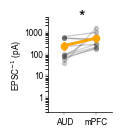

In [18]:
fig, ax = plt.subplots(figsize = (1.2,1.35))
sns.pointplot(data = ints[(ints['cellType'] == 'MSN')&(ints['sensArea'] == 'A1')], x = 'stimType', y = 'absEPSC', order = ['590', '405'], hue = 'file', palette = 'dark:k', legend = False, linewidth = 1, markersize = 3)
plt.setp(ax.collections, alpha=.2) #for the markers
plt.setp(ax.lines, alpha=.2) 
sns.pointplot(data = ints[(ints['cellType'] == 'MSN')&(ints['sensArea'] == 'A1')], x = 'stimType', y = 'absEPSC', order = ['590', '405'], color = 'Orange', errorbar = ('se'), linewidth = 2, markersize = 4)

ax.set_yscale('log')
ax.set_ylim(0.2, 5000)

ax.set_ylabel('EPSC$^{-1}$ (pA)', fontsize = 6, labelpad = 0)
ax.set_xticks([0,1])
ax.set_xticklabels(['AUD', 'mPFC'], fontsize = 6)

ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels([1, 10, 100, 1000], fontsize = 6)
ax.set_xlabel(None)

ax.text(0.45, 3000, '*', fontsize = 12)

sns.despine()

plt.tight_layout()
plt.savefig('../figOutputs/Fig3_MSNs_A1_EPSC.pdf', dpi = 300, transparent = True, bbox_inches = 'tight')


In [19]:
ss.mannwhitneyu(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)]['absEPSC'], ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 590)]['absEPSC'])

MannwhitneyuResult(statistic=93.0, pvalue=0.03561636409984438)

In [20]:
print(len(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)]['date'].unique()))
print(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)]['absEPSC'].sem())
print('')
print(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 590)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 590)]['absEPSC'].sem())
print("")
print(len(ints[(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)]))

3
520.2976606108925
126.51201229542838

233.70222876288673
65.64380076458262

11


### S1

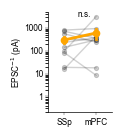

In [21]:
fig, ax = plt.subplots(figsize = (1.2,1.35))
sns.pointplot(data = ints[(ints['cellType'] == 'MSN')&(ints['sensArea'] == 'S1')], x = 'stimType', y = 'absEPSC', order = ['590', '405'], hue = 'file', palette = 'dark:k', legend = False, linewidth = 1, markersize = 3)
plt.setp(ax.collections, alpha=.2) #for the markers
plt.setp(ax.lines, alpha=.2) 
sns.pointplot(data = ints[(ints['cellType'] == 'MSN')&(ints['sensArea'] == 'S1')], x = 'stimType', y = 'absEPSC',order = ['590', '405'], color = 'Orange', errorbar = ('se'), linewidth = 2, markersize = 4)

ax.set_yscale('log')
ax.set_ylim(0.2,5000)

ax.set_ylabel('EPSC$^{-1}$ (pA)', fontsize = 6, labelpad = 0)
ax.set_xticks([0,1])
ax.set_xticklabels(['SSp', 'mPFC'], fontsize = 6)

ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels([1, 10, 100, 1000], fontsize = 6)
ax.set_xlabel(None)

ax.text(0.4, 3000, 'n.s.', fontsize = 6)

sns.despine()

plt.tight_layout()
plt.savefig('../figOutputs/Fig3_MSNs_S1_EPSC.pdf', dpi = 300, transparent = True, bbox_inches = 'tight')


In [22]:
ss.mannwhitneyu(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)]['absEPSC'], ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 590)]['absEPSC'])

MannwhitneyuResult(statistic=73.0, pvalue=0.430708328947102)

In [23]:
print(len(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)]['date'].unique()))
print(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)]['absEPSC'].sem())
print('')
print(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 590)]['absEPSC'].mean())
print(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 590)]['absEPSC'].sem())
print("")
print(len(ints[(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)]))

3
592.282064481215
258.0651778926368

294.5593926256353
82.20868411418502

11


### EPSC Delays

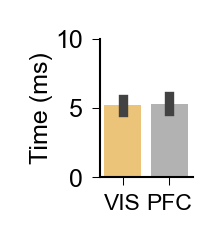

In [24]:
fig, ax = plt.subplots(figsize = (0.4, 0.6), dpi =  300)
temp = ints[(ints['cellType'] == 'MSN')&(ints['sensArea'] == 'V1')]
sns.barplot(data = temp, x = 'stimType', y = 'epscDelay', hue = 'stimType', order = [590, 405], legend = False, errorbar = ("se"), palette = ['0.5','orange'], alpha = 0.6)

ax.set_xticks([0,1])
ax.set_xticklabels(['VIS', 'PFC'], fontsize =5.5)
ax.set_xlabel(None)
ax.set_ylabel('Time (ms)', fontsize = 6, labelpad = 0.5)
ax.set_yticks([0,5,10])
ax.set_yticklabels([0,5,10], fontsize =6)

sns.despine()
plt.savefig('../figOutputs/Fig3_MSN_V1_delays.pdf', bbox_inches = 'tight', dpi = 300, transparent = True)

In [25]:
print(temp[temp['stimType'] == 405]['epscDelay'].mean())
print(temp[temp['stimType'] == 405]['epscDelay'].sem())
print ('')
print(temp[temp['stimType'] == 590]['epscDelay'].mean())
print(temp[temp['stimType'] == 590]['epscDelay'].sem())

5.323076923076924
0.5274702380902697

5.200000000000001
0.4657500154837109


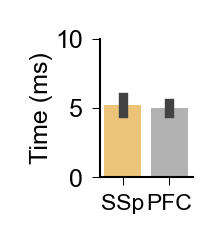

In [26]:
fig, ax = plt.subplots(figsize = (0.4, 0.6), dpi =  300)
temp = ints[(ints['cellType'] == 'MSN')&(ints['sensArea'] == 'S1')&(ints['epscDelay'] > 0)]
sns.barplot(data = temp, x = 'stimType', y = 'epscDelay', hue = 'stimType', order = [590, 405], legend = False, errorbar = ("se"), palette = ['0.5','orange'], alpha = 0.6)

ax.set_xticks([0,1])
ax.set_xticklabels(['SSp', 'PFC'], fontsize =5.5)
ax.set_xlabel(None)
ax.set_ylabel('Time (ms)', fontsize = 6, labelpad = 0.5)
ax.set_yticks([0,5,10])
ax.set_yticklabels([0,5,10], fontsize =6)

sns.despine()
plt.savefig('../figOutputs/Fig3_MSN_S1_delays.pdf', bbox_inches = 'tight', dpi = 300, transparent = True)

In [27]:
print(temp[temp['stimType'] == 405]['epscDelay'].mean())
print(temp[temp['stimType'] == 405]['epscDelay'].sem())
print ('')
print(temp[temp['stimType'] == 590]['epscDelay'].mean())
print(temp[temp['stimType'] == 590]['epscDelay'].sem())

5.000000000000001
0.35402448126271335

5.236363636363635
0.5629908326837573


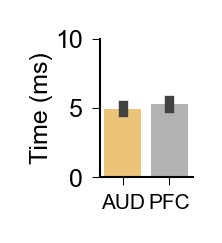

In [28]:
fig, ax = plt.subplots(figsize = (0.4, 0.6), dpi =  300)
temp = ints[(ints['cellType'] == 'MSN')&(ints['sensArea'] == 'A1')&(ints['epscDelay'] > 0)]
sns.barplot(data = temp, x = 'stimType', y = 'epscDelay', order = [590, 405], hue = 'stimType', legend = False, errorbar = ("se"), palette = ['0.5','orange'], alpha = 0.6)

ax.set_xticks([0,1])
ax.set_xticklabels(['AUD', 'PFC'], fontsize =5)
ax.set_xlabel(None)
ax.set_ylabel('Time (ms)', fontsize = 6, labelpad = 0.5)
ax.set_yticks([0,5,10])
ax.set_yticklabels([0,5,10], fontsize =6)

sns.despine()
plt.savefig('../figOutputs/Fig3_MSN_A1_delays.pdf', bbox_inches = 'tight', dpi = 300, transparent = True)

In [29]:
print(temp[temp['stimType'] == 405]['epscDelay'].mean())
print(temp[temp['stimType'] == 405]['epscDelay'].sem())
print ('')
print(temp[temp['stimType'] == 590]['epscDelay'].mean())
print(temp[temp['stimType'] == 590]['epscDelay'].sem())

5.290909090909091
0.3240242823264795

4.963636363636364
0.23482013514127917


In [30]:
ints = pd.read_excel('../data/Fig3/cinsAuto.xlsx')

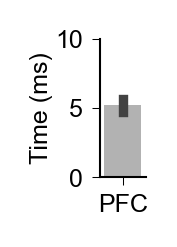

In [31]:
fig, ax = plt.subplots(figsize = (0.2, 0.6), dpi =  300)
temp = ints[(ints['cellType'] == 'CIN')&(ints['sensArea'] == 'V1')&(ints['stimType'] == 405)&(ints['epscDelay'] > 0)]
sns.barplot(data = temp, x = 'stimType', y = 'epscDelay', errorbar = ("se"), color = '0.5', alpha = 0.6)

ax.set_xticks([0])
ax.set_xticklabels(['PFC'],fontsize =6)
ax.set_xlabel(None)
ax.set_ylabel('Time (ms)', fontsize = 6, labelpad = 0.5)
ax.set_yticks([0,5,10])
ax.set_yticklabels([0,5,10], fontsize =6)

sns.despine()
plt.savefig('../figOutputs/Fig3_CIN_V1_delays.pdf', bbox_inches = 'tight', dpi = 300, transparent = True)

In [32]:
print(temp[temp['stimType'] == 405]['epscDelay'].mean())
print(temp[temp['stimType'] == 405]['epscDelay'].sem())

5.200000000000001
0.46849458853564085


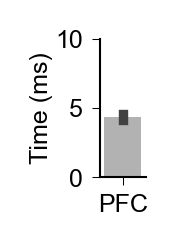

In [33]:
fig, ax = plt.subplots(figsize = (0.2, 0.6), dpi = 300)
temp = ints[(ints['cellType'] == 'CIN')&(ints['sensArea'] == 'S1')&(ints['stimType'] == 405)&(ints['epscDelay'] > 0)]
sns.barplot(data = temp, x = 'stimType', y = 'epscDelay', errorbar = ("se"), color = '0.5', alpha = 0.6)

ax.set_xticks([0])
ax.set_xticklabels(['PFC'], fontsize = 6)
ax.set_xlabel(None)
ax.set_ylabel('Time (ms)', fontsize = 6, labelpad = 0.5)
ax.set_yticks([0,5,10])
ax.set_yticklabels([0,5,10], fontsize = 6)

sns.despine()

plt.savefig('../figOutputs/Fig3_CIN_S1_delays.pdf', bbox_inches = 'tight', dpi = 300, transparent = True)

In [34]:
print(temp[temp['stimType'] == 405]['epscDelay'].mean())
print(temp[temp['stimType'] == 405]['epscDelay'].sem())

4.333333333333333
0.20275875100994067


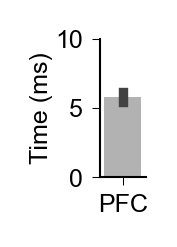

In [35]:
fig, ax = plt.subplots(figsize = (0.2, 0.6), dpi = 300)
temp = ints[(ints['cellType'] == 'CIN')&(ints['sensArea'] == 'A1')&(ints['stimType'] == 405)&(ints['epscDelay'] > 0)]
sns.barplot(data = temp, x = 'stimType', y = 'epscDelay', errorbar = ("se"), color = '0.5', alpha = 0.6)

ax.set_xticks([0])
ax.set_xticklabels(['PFC'], fontsize =6)
ax.set_xlabel(None)
ax.set_ylabel('Time (ms)', fontsize = 6, labelpad = 0.5)
ax.set_yticks([0,5,10])
ax.set_yticklabels([0,5,10], fontsize = 6)

sns.despine()
plt.savefig('../figOutputs/Fig3_CIN_A1_delays.pdf', bbox_inches = 'tight', dpi = 300, transparent = True)

In [36]:
temp =  ints[(ints['cellType'] == 'CIN')&(ints['sensArea'] == 'A1')&(ints['epscDelay'] > 0)]

print(temp[temp['stimType'] == 405]['epscDelay'].mean())
print(temp[temp['stimType'] == 405]['epscDelay'].sem())

5.775
0.34731109973624513
